# MIE 1624 Introduction to Data Science and Analytics 

# Winter 2019

---

# Assignment 2

# Salary prediction

---

**Submitted by: Stepan Oskin**
**S/N: 1004648624**


---

**March 25, 2019**

---

---

## Preparations

### Import dependencies

In [1]:
# Import Python packages
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', 0)

### Define functions

#### `plot_bars_with_minmax`

In [27]:
def plot_bars_with_minmax(series_to_plot, plot_title, horizontal=False, color='gray',
                          fig_height=5, fig_width=8,
                          font_color='darkblue',
                          xlabel="", ylabel="", tick_label_size=16,
                          with_minmax=True, with_mean=True,
                          min_border=0.95, max_border=0.99, minmax_width=0.5,
                          sup_line=None):
    """
    a function to plot a gray bar chart from a pandas Series,
    plots mean
    highlights bars with min and max values

    Input arguments: series_to_plot -- pandas Series -- Series to plot as a bar chart
                     title          -- string        -- string containing title of the chart
                     with_minmax    -- boolean       -- option to highlight extreme values
                                                        from the Series (default=True)
                     min_border     -- float         -- height limit for black min bar on the plot
                                                        (default=0.95)
                     max_border     -- float         -- height limit for lightgray max bar on the plot
                                                        (default=0.99)
                     minmax_width   -- float         -- width for min and max bars on the plot
                                                        (default=0.5)


    Output:          None, plots and shows bar chart with mean and extremes (optional) highlighted
    """
    font = dict(family='serif', color=font_color, weight='normal', size=16)

    # create figure and axis
    fig, ax = plt.subplots(1, figsize=(fig_width, fig_height))

    if horizontal:
        # plot a horizontal bar chart from input Series
        sns.barplot(x=series_to_plot, y=series_to_plot.index, color=color, ax=ax)
        if with_mean:
            # plot mean of the series
            ax.axvline(series_to_plot.mean(), color='black', linestyle='--', linewidth=1)
            ax.text(series_to_plot.mean() * 1.05,
                    0,
                    "Mean: {0:.2f}".format(series_to_plot.mean()),
                    fontsize=16)
        if sup_line:
            ax.axhline(sup_line, color='black', linestyle='--', linewidth=1)
        # optional: highlight the bars with minimum values (if input parameter 'with_min' is True)
        if with_minmax:
            min_se = series_to_plot[series_to_plot == series_to_plot.min()]
            #plt.barh(min_se.index,
            #         min_se * min_border,
            #         minmax_width,
            #         color='black')
            sns.barplot(x=min_se * min_border, y=min_se.index, color='black', alpha=0.8, ax=ax)

            max_se = series_to_plot[series_to_plot == series_to_plot.max()]
            sns.barplot(x=max_se * max_border, y=max_se.index, color='lightgray', ax=ax)

            #plt.barh(max_se.index,
            #         max_se * max_border,
            #         minmax_width,
            #         color='lightgray')
        # set axis parameters
        ax.set_xlabel(xlabel, fontdict=font)
        ax.set_ylabel(ylabel, fontdict=font)
        #ax.tick_params('both', labelrotation=1, labelsize=tick_label_size)

    else:
        # plot a bar chart from input Series
        plt.bar(x=series_to_plot.index,
                height=series_to_plot,
                color=color)

        if with_mean:
            # plot mean of the series
            ax.axhline(series_to_plot.mean(), color='black', linestyle='--', linewidth=1)
            ax.text(0,
                    series_to_plot.mean() * 1.01,
                    "Mean: {0:.2f}".format(series_to_plot.mean()))

        # optional: highlight the bars with minimum values (if input parameter 'with_min' is True)
        if with_minmax:
            min_se = series_to_plot[series_to_plot == series_to_plot.min()]
            plt.bar(x=min_se.index,
                    height=min_se * min_border,
                    color='black',
                    width=minmax_width)
            max_se = series_to_plot[series_to_plot == series_to_plot.max()]
            plt.bar(x=max_se.index,
                    height=max_se * max_border,
                    color='lightgray',
                    width=minmax_width)
        if sup_line:
            ax.axvline(sup_line, color='black', linestyle='--', linewidth=1)
        # set axis parameters
        ax.set_xlabel(xlabel, fontdict=font)
        ax.set_xticks(series_to_plot.index)
        ax.set_ylabel(ylabel, fontdict=font)
        #ax.tick_params('both', labelrotation=1, labelsize=tick_label_size)

    # set general axis parameters
    ax.set_title(plot_title, fontdict=font)
    ax.grid(False)

    plt.show()
    return


#### `plot_q_parts`

In [3]:
def plot_q_parts(question_list, response_df,
                 question, parts,
                 comment='', return_subset=False, tick_label_size=12,
                 fig_height=5, fig_width=8,
                 with_minmax=True):
    """
    a function to plot results of a question from Kaggle survey
    that are stored in a range of columns
    """
    question_start_col = question + '_Part_1'
    question_last_col = question + '_Part_' + str(parts)

    question_subset = response_df.loc[:, question_start_col:question_last_col]
    answer_categories = []
    for column in question_subset.columns:
        answer_categories.append(question_list.loc[column].split(' - ')[-1])

    question_subset.columns = answer_categories

    series_to_plot = question_subset.count().sort_values(ascending=False)

    title = question + ': ' + question_list[question + '_Part_1'].split(' - ')[0] + '\n' + comment

    plot_bars_with_minmax(series_to_plot, title, horizontal=True,
                          with_mean=False,
                          tick_label_size=tick_label_size,
                          fig_height=fig_height, fig_width=fig_width,
                          with_minmax=with_minmax)

    if return_subset:
        return series_to_plot
    else:
        return


#### `plot_hist`

In [4]:
def plot_hist(series_to_plot, bins=10, plot_title='Histogram',
              with_mean=True, with_median=True, with_max=False, units="",
              mean_color='lightgray', median_color='black',
              mean_lab_xpos=1.1, med_lab_xpos=0.7, mean_med_lab_ypos=30., max_lab_ypos=0.7,
              flip_mean_med_labels=False,
              fig_width=8, fig_height=5,
              xlabel='x', ylabel='Count', ticks_sep=True,
              drop_na=True, font_color='darkblue'):
    """
    a function to plot a histogram of the provided pandas Series

    :param font_color:            string -- color to use for title and axis labels
    :param median_color:          string -- color to use for mean label
    :param mean_color:            string -- color to use for median label
    :param units:                 string -- units to be used for mean and median
    :param ylabel:                string -- label for x axis
    :param xlabel:                string -- label for y axis
    :param flip_mean_med_labels: boolean -- option to switch positions of mean and median labels
    :param max_lab_ypos:           float -- parameter to position max label
    :param med_lab_xpos:           float -- parameter to position median label
    :param mean_lab_xpos:          float -- parameter to position mean label
    :param mean_med_lab_ypos:      float -- parameter to position mean and median labels
    :param with_max:             boolean -- option to plot max histogram bin count
    :param drop_na:              boolean -- option to drop missing values from Series
    :param plot_title:            string -- title of the plot
    :param series_to_plot: pandas Series -- Series to plot a histogram of
    :param bins:                     int -- number of bins to use for the histogram
    :param with_mean:            boolean -- whether to plot the mean of the Series
    :param with_median:          boolean -- whether to plot the median of the Series
    :param fig_width:              float -- width of the plot
    :param fig_height:             float -- height of the plot
    :return: None
    """
    font = dict(family='serif', color=font_color, weight='normal', size=16)

    if drop_na:
        # drop missing values from the Series
        series_to_plot = series_to_plot.dropna()

    # create figure and axis
    fig, ax = plt.subplots(1, figsize=(fig_width, fig_height))

    # plot histogram of the column values
    n, bins, patches = ax.hist(series_to_plot, bins=bins)

    # max count from all bins
    hist_max = n.max()

    if flip_mean_med_labels:
        # switch positions of mean and median labels on the plot
        temp = mean_lab_xpos
        mean_lab_xpos = med_lab_xpos
        med_lab_xpos = temp
    if with_mean:
        # plot mean of the column values
        col_mean = series_to_plot.mean()
        ax.axvline(col_mean, linestyle='--', color='darkgray')
        ax.text(col_mean * mean_lab_xpos,
                hist_max / mean_med_lab_ypos,
                'Mean: {0:,.2f}'.format(col_mean) + units,
                rotation=90, fontsize=12, color=mean_color, va='bottom')
    if with_median:
        col_median = series_to_plot.median()
        ax.axvline(col_median, linestyle='--', color='black')
        ax.text(col_median * med_lab_xpos,
                hist_max / mean_med_lab_ypos,
                'Median: {0:,.2f}'.format(col_median) + units,
                rotation=90, fontsize=12, va='bottom',
                color=median_color)

    if with_max:
        # plot max of the histogram counts
        ax.text(0, hist_max * max_lab_ypos, 
                'Max histogram bin count: {0:,.0f}'.format(hist_max),
                fontsize=12, color='black')

    # set axis parameters
    ax.grid(False)
    ax.set_title(plot_title, fontdict=font)
    ax.set_ylabel(ylabel, fontdict=font)
    ax.set_xlabel(xlabel, fontdict=font)
    ax.tick_params('both', labelsize=14)

    if ticks_sep:
        # add thousands separator to x and y ticks
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        # add thousands separator to x and y ticks
        ax.get_xaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.show()

#### `plot_scatter`

In [5]:
def plot_scatter(ser1=None, ser2=None,
                 ser1_name="x", ser2_name="y",
                 plot_title="", tick_label_size=14,
                 fit_reg=False, alpha=0.5,
                 xticks_pos=None, xticks_lab=None):
    """
    a function to plot a scatter plot of 2 variables
    found in 'col1' and 'col2' of the
    supplied DataFrame 'df'
    """
    # set font parameters
    font = dict(family='serif', color='darkred', weight='normal', size=16)

    # set figure size
    fig, ax = plt.subplots(1, figsize=(8, 8))

    # plot the scatter plot
    sns.regplot(x=ser1, y=ser2,
                fit_reg=fit_reg,
                scatter_kws={'alpha': alpha},
                ax=ax)

    # set axis parameters
    ax.set_ylabel(ser2_name, fontdict=font)
    ax.set_xlabel(ser1_name, fontdict=font)
    ax.set_title(plot_title, fontdict=font)
    plt.tick_params(labelsize=tick_label_size)

    if xticks_pos:
        plt.xticks(xticks_pos, xticks_lab)

    plt.show()
    return


#### `plot_heatmap`

In [6]:
def plot_heatmap(df_to_plot):
    """
    a function to plot a heat map from a pandas DataFrame
    """
    # create figure and axis
    fig, ax = plt.subplots(figsize=(20, 20))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(50, 10, as_cmap=True)

    # Draw the heat map with the mask and correct aspect ratio
    sns.heatmap(df_to_plot,
                cmap=cmap,
                vmax=1,
                center=0,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .5},
                annot=True,
                ax=ax)

    plt.show()


### Read Kaggle survey data

In [7]:
kaggle_survey_path = 'kaggle_salary.csv'

question_list = pd.read_csv(kaggle_survey_path, nrows=1)
question_list = question_list.iloc[0]

responses_only = pd.read_csv(kaggle_survey_path, low_memory=False)
responses_only = responses_only.drop(0)
responses_only = responses_only.drop('index', axis=1)

responses_only['Time from Start to Finish (seconds)'] = \
    responses_only['Time from Start to Finish (seconds)'].astype('int')

responses_only['Time from Start to Finish (minutes)'] = \
    responses_only['Time from Start to Finish (seconds)'] // 60

responses_only = responses_only.drop('Unnamed: 0', axis=1)

responses_only['Q9'] = pd.to_numeric(responses_only['Q9'], errors='raise')

print("{0:,} rows in the DataFrame.".format(len(responses_only)))
responses_only.head(1)

15,429 rows in the DataFrame.


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_Part_2,Q45_P

## Data cleaning

### Missing values

Features that are present in the largest number of samples can present better training material for the model to calibrate its predictions on. In Kaggle dataset, there are columns with a high number of missing values. These columns represent **categorical variables that have too many levels**, or levels which rarely occur. These levels have minimal chance of making an impact on the model, and will be removed from the dataset.

#### Columns

In [8]:
responses_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 15429
Columns: 396 entries, Time from Start to Finish (seconds) to Time from Start to Finish (minutes)
dtypes: int32(2), int64(1), object(393)
memory usage: 46.6+ MB


Columns with more than 20% of missing records will negatively affect the performance of the model, and are removed from the DataFrame.

In [9]:
min_records = int(len(responses_only) * 0.2)
min_records

3085

In [10]:
null_counts = responses_only.isnull().sum(axis=0)

print("{0} columns out of {1} total have more than {2:.2f}% of records missing."
      .format(len(null_counts[null_counts > min_records]),
              len(responses_only.columns),
              min_records / len(responses_only) * 100))

343 columns out of 396 total have more than 19.99% of records missing.


In [11]:
remove_cols = null_counts[null_counts > min_records].index
responses_only_filtered = responses_only.drop(remove_cols, axis=1)
print("DataFrame now has {0} columns.".format(len(responses_only_filtered.columns)))

DataFrame now has 53 columns.


### Remove columns containing non-categorical info

In [12]:
ot_question_cols = [col for col in responses_only_filtered.columns if 'OTHER' in col]
responses_only_filtered = responses_only_filtered.drop(ot_question_cols, axis=1)

ot_question_cols = [col for col in responses_only_filtered.columns if 'TEXT' in col]
responses_only_filtered = responses_only_filtered.drop(ot_question_cols, axis=1)

ot_question_cols = [col for col in responses_only_filtered.columns if 'MULTIPLE_CHOICE' in col]
responses_only_filtered = responses_only_filtered.drop(ot_question_cols, axis=1)

print("DataFrame now has {0} columns.".format(len(responses_only_filtered.columns)))

DataFrame now has 17 columns.


### Filter out all responses that took less than 5 minutes

It took responders an average of 17.91 minutes to complete the survey, answers submitted in under 5 minutes are considered to be inaccurate, as it is unlikely that a respondent could reply to all 50 questions accurately in under 5 minutes. These records represent the spike in the distribution around 0 and are removed from the dataset.

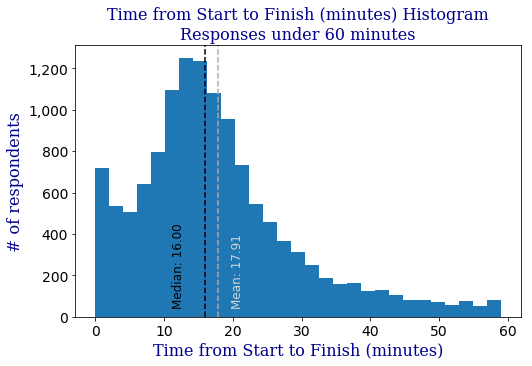

In [13]:
question = 'Time from Start to Finish (minutes)'
comment = 'Responses under 60 minutes'
ylabel = '# of respondents'

mask = responses_only_filtered[question] < 60

series_to_plot = responses_only.loc[mask, question]
title = question + ' Histogram' + '\n' + comment

plot_hist(series_to_plot, plot_title=title,
          bins=29, xlabel=question, ylabel=ylabel)

In [14]:
# set param to filter out all records with Time to Start to Finish < 5 min (in seconds)
min_time = 5 * 60

old_len = len(responses_only)

mask = responses_only['Time from Start to Finish (seconds)'] < min_time
responses_only = responses_only.drop(responses_only[mask].index)
print("{0:,} ({1:.2f}% out of the total {2:,}) respondents that \
took less than 5 minutes to answer the survey\nhave been filtered out."
      .format(old_len - len(responses_only),
              (old_len - len(responses_only)) / old_len * 100,
              old_len))
print("{0:,} records remain in the DataFrame.".format(len(responses_only)))

1,253 (8.12% out of the total 15,429) respondents that took less than 5 minutes to answer the survey
have been filtered out.
14,176 records remain in the DataFrame.


Remove columns with `"Time to start to Finish"`

In [15]:
responses_only_filtered = responses_only_filtered.drop(['Time from Start to Finish (seconds)', 
                                                       'Time from Start to Finish (minutes)'],
                                                       axis=1)
responses_only_filtered.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q18',
       'Q23', 'Q24', 'Q25', 'Q26'],
      dtype='object')

### Filter out all responses coming from students

Since this is intended to be a model predicting salaries, only responses coming from paid professionals will be considered. 

#### Job titles of respondents

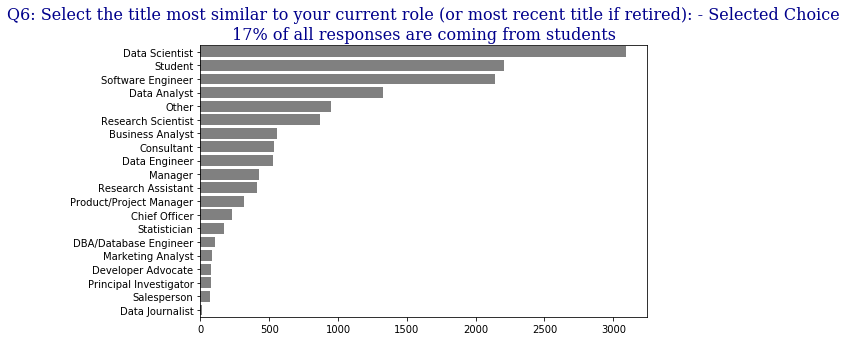

In [28]:
question = 'Q6'
comment = '17% of all responses are coming from students'

series_to_plot = responses_only[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True,
                      with_mean=False, with_minmax=False,
                      tick_label_size=12)

**Filter out all responses coming from students**

In [17]:
old_len = len(responses_only_filtered)

mask = responses_only_filtered['Q6'] == 'Student'

responses_only_filtered = responses_only_filtered.drop(responses_only_filtered[mask].index)
print("{0:,} ({1:.2f}% out of the total {2:,}) responses coming\
 from students have been filtered out."
      .format(old_len - len(responses_only_filtered),
              (old_len - len(responses_only_filtered)) / old_len * 100,
              old_len))
print("{0:,} records remain in the DataFrame."
      .format(len(responses_only_filtered)))

2,620 (16.98% out of the total 15,429) responses coming from students have been filtered out.
12,809 records remain in the DataFrame.


#### Industry of respondents

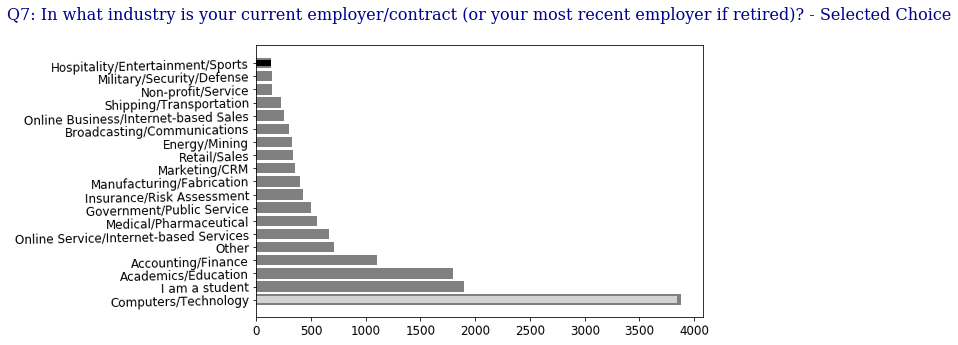

In [18]:
question = 'Q7'
comment = ''

series_to_plot = responses_only[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False,
                      tick_label_size=12)

**Filter out all responses coming from students**

In [19]:
old_len = len(responses_only_filtered)

mask = responses_only_filtered['Q7'] == 'I am a student'

responses_only_filtered = responses_only_filtered.drop(responses_only_filtered[mask].index)
print("{0:,} ({1:.2f}% out of the total {2:,}) responses coming \
from students have been filtered out."
      .format(old_len - len(responses_only_filtered),
              (old_len - len(responses_only_filtered)) / old_len * 100,
              old_len))
print("{0:,} records remain in the DataFrame."
      .format(len(responses_only_filtered)))

445 (3.47% out of the total 12,809) responses coming from students have been filtered out.
12,364 records remain in the DataFrame.


### Removing irrelevant questions

Since this is intended to be a model predicting salaries, only responses regarding the work of paid professionals will be considered. 

In [20]:
question_list['Q18']

'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'

In [21]:
responses_only_filtered = responses_only_filtered.drop('Q18', axis=1)

### Encoding categorical data into numerical format

Categorical variables cannot be fit into regression equations in their raw form, and must be encoded.

This will be performed after the Exploratory Data Analysis (EDA) as part of Feature selection.

## Exploratory data analysis (EDA)

In [22]:
responses_only_filtered.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q23',
       'Q24', 'Q25', 'Q26'],
      dtype='object')

### Target

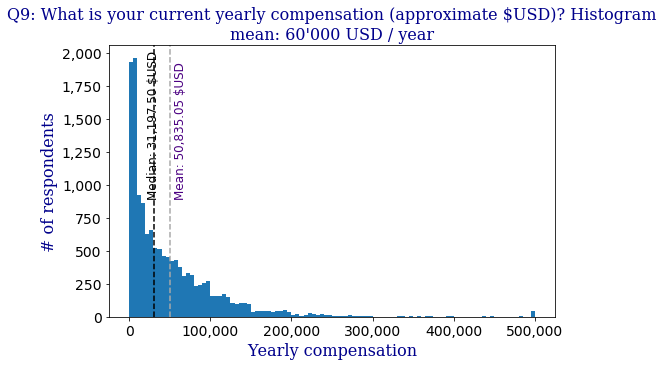

In [23]:
question = 'Q9'
comment = "mean: 60'000 USD / year"
ylabel = '# of respondents'
xlabel = 'Yearly compensation'

series_to_plot = responses_only[question]

title = question + ': ' + question_list[question]\
    + ' Histogram' + '\n' + comment

plot_hist(series_to_plot, plot_title=title,
          bins=100, xlabel=xlabel, ylabel=ylabel, units=' \$USD', 
          mean_color='indigo', mean_med_lab_ypos=2.2)

### Features

**The questions from the final list of features appear to be sensible in terms of salary prediciton.**

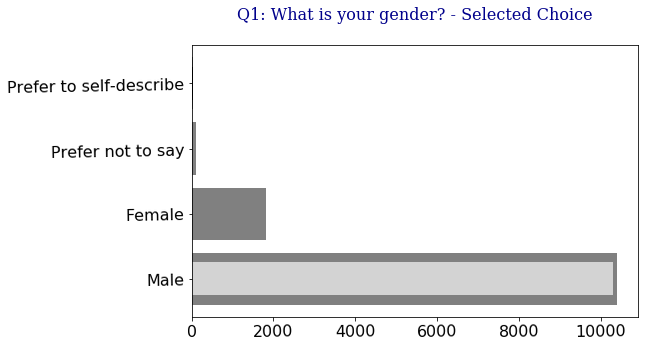

In [24]:
question = 'Q1'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, 
                      horizontal=True, with_mean=False)

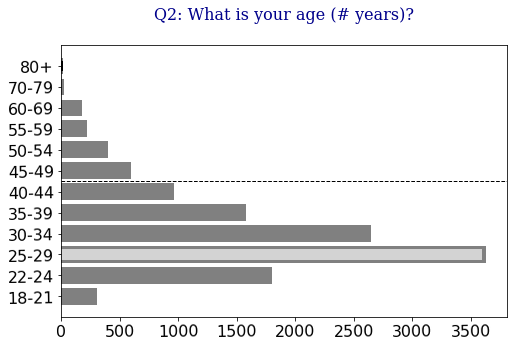

In [25]:
question = 'Q2'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts().sort_index()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, 
                      horizontal=True, with_mean=False, sup_line=5.5)

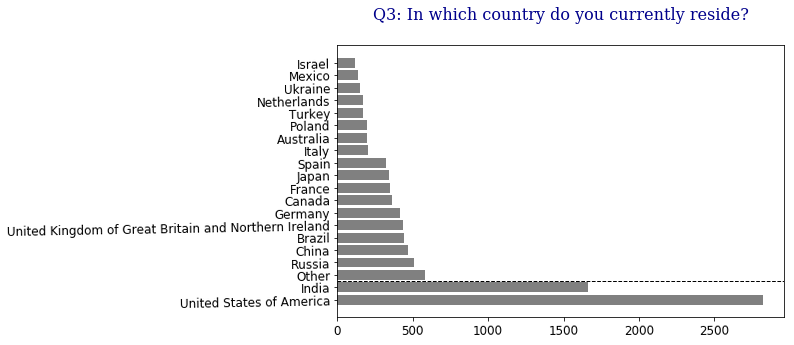

In [26]:
question = 'Q3'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()[:20]
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False, with_minmax=False, sup_line=1.5,
                      tick_label_size=12)

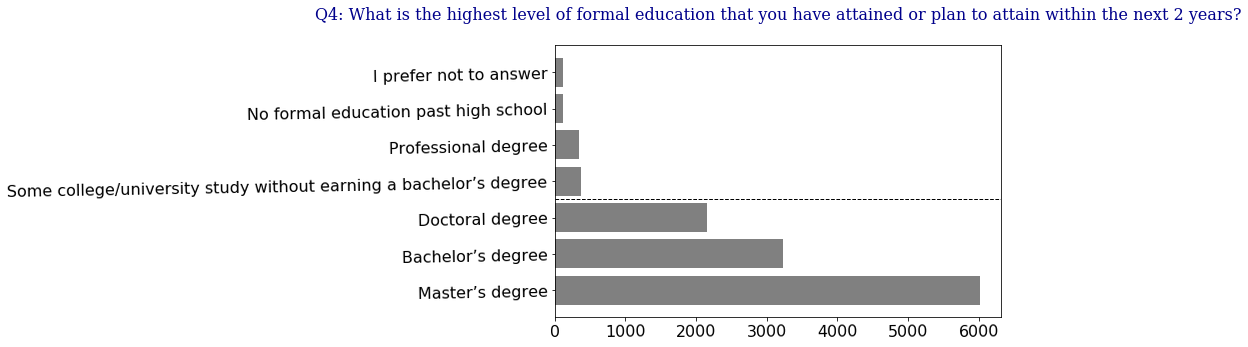

In [27]:
question = 'Q4'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False, with_minmax=False, sup_line=2.5,
                      tick_label_size=16)

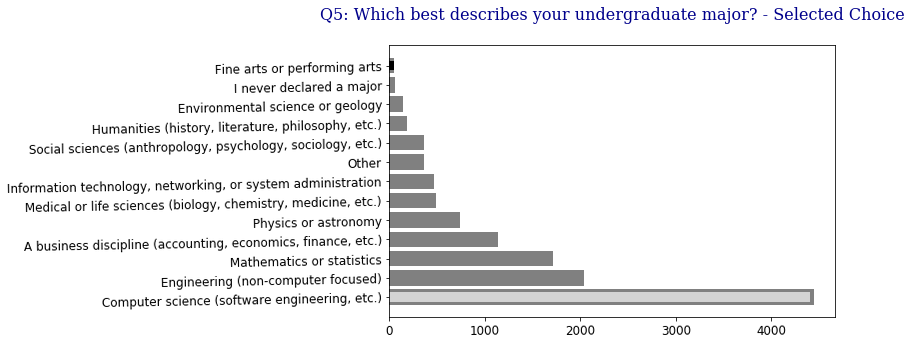

In [28]:
question = 'Q5'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False,
                      tick_label_size=12)

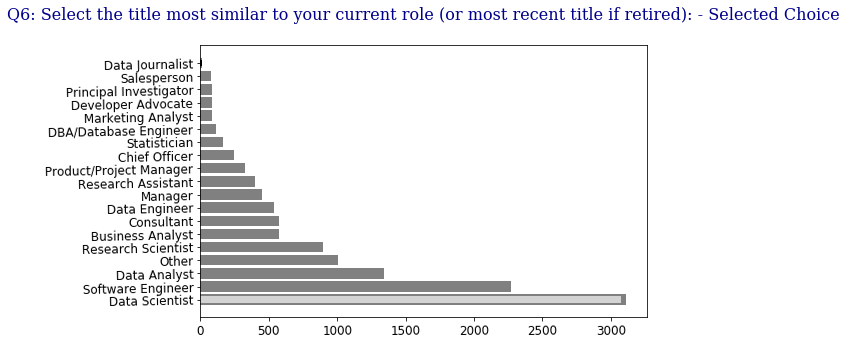

In [29]:
question = 'Q6'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False,
                      tick_label_size=12)

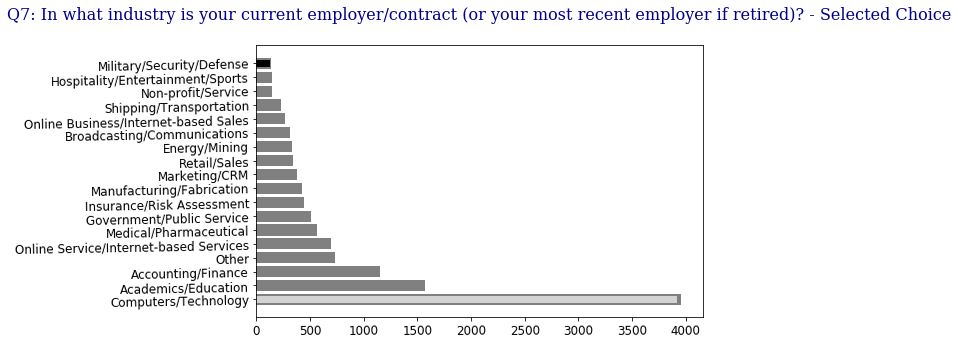

In [30]:
question = 'Q7'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False,
                      tick_label_size=12)

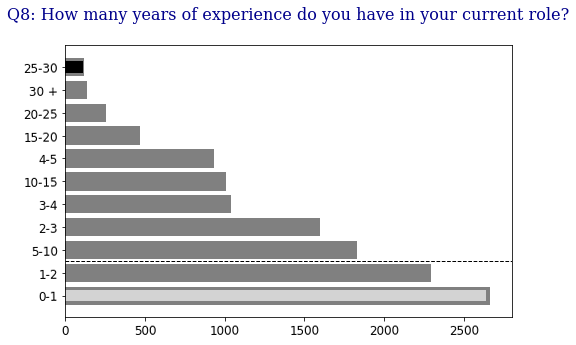

In [31]:
question = 'Q8'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False, sup_line=1.5,
                      tick_label_size=12)

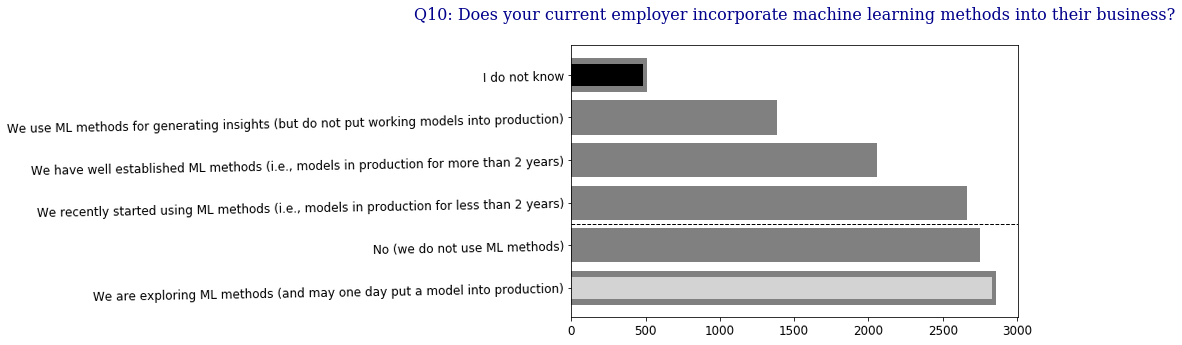

In [32]:
question = 'Q10'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False, sup_line=1.5,
                      tick_label_size=12)

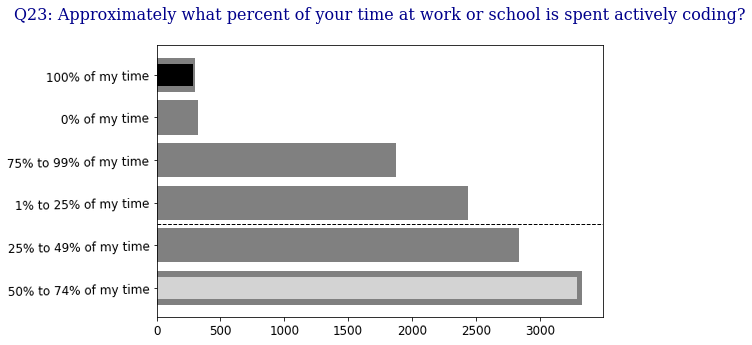

In [33]:
question = 'Q23'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False, sup_line=1.5,
                      tick_label_size=12)

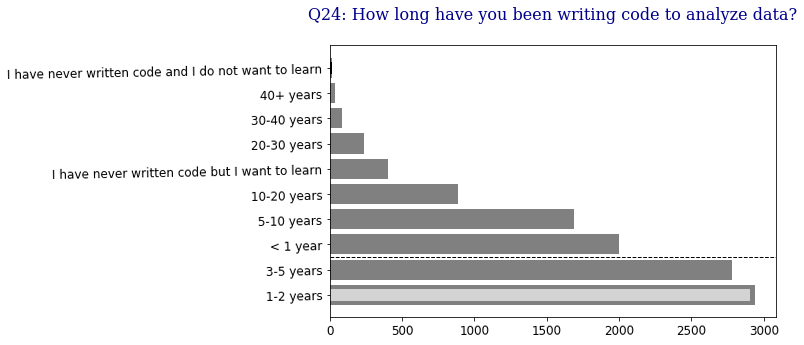

In [34]:
question = 'Q24'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False, sup_line=1.5,
                      tick_label_size=12)

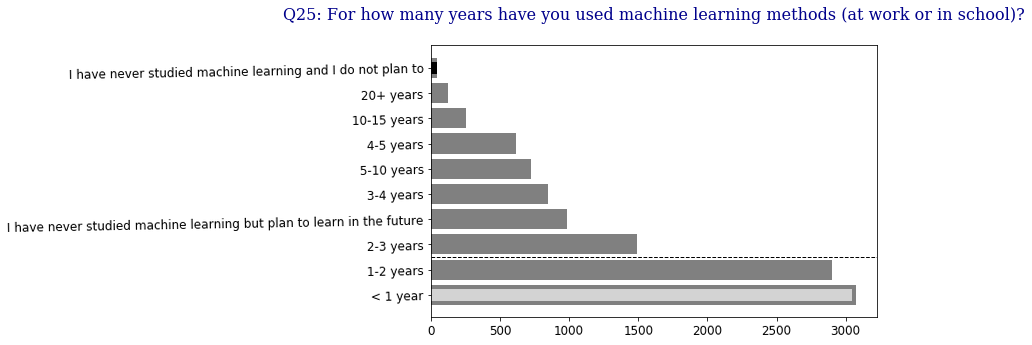

In [35]:
question = 'Q25'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False, sup_line=1.5,
                      tick_label_size=12)

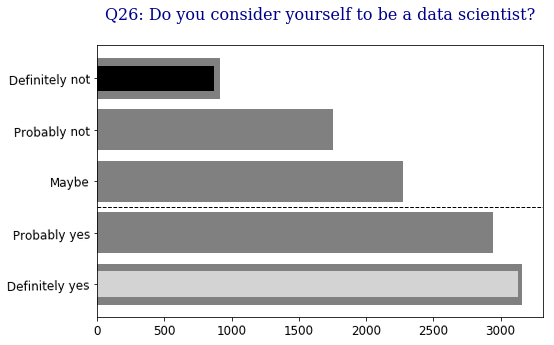

In [36]:
question = 'Q26'
comment = ''

series_to_plot = responses_only_filtered[question].value_counts()
title = question + ': ' + question_list[question] + '\n' + comment

plot_bars_with_minmax(series_to_plot, title, horizontal=True, 
                      with_mean=False, sup_line=1.5,
                      tick_label_size=12)

### Relationships between variables

**Gender pay gap**

In [37]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
def label_encode(col):
    col = labelencoder.fit_transform(col)
    return col

x = pd.Series(label_encode(responses_only['Q1']))
x.reset_index(drop=True, inplace=True)
x.value_counts()

1    11843
0    2185 
2    104  
3    44   
dtype: int64

In [38]:
responses_only['Q1'].value_counts()

Male                       11843
Female                     2185 
Prefer not to say          104  
Prefer to self-describe    44   
Name: Q1, dtype: int64

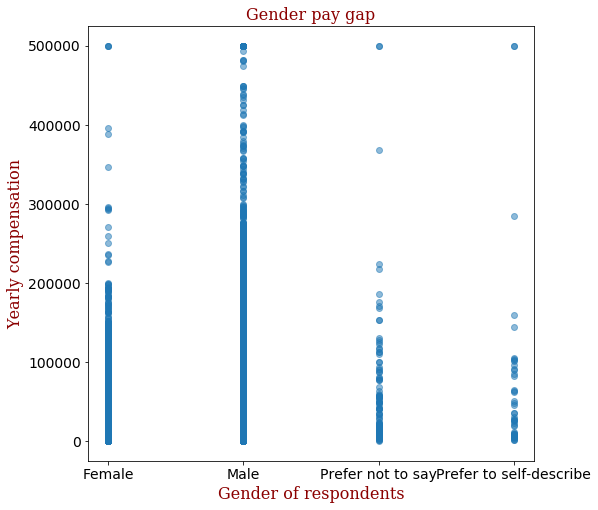

In [39]:
y = responses_only['Q9']
ylabel = "Yearly compensation"
xlabel = "Gender of respondents"
title = "Gender pay gap"
plot_scatter(plot_title=title, ser1=x, ser2=y, ser1_name=xlabel, ser2_name=ylabel, 
             xticks_pos=(0, 1, 2, 3), 
             xticks_lab=('Female', 'Male', 'Prefer not to say', 'Prefer to self-describe'))

Order of feature importance is visualized in the following section Feature selection.

## Feature selection

### Methodology for feature selection

Feature selection is one of the core concepts in Machince Learning (ML) and can have a dramatic impact on the performance of the model, as irrelevant or partially relevant features can have a negative impact on model performance.

**Methodology for feature selection**

Initially, features were selected in section Data cleaning based on the number of present entries. Features that are not present throughout the majority of records have been dropped.

The list of features that was produced based on counts of missing entries was then validated visually through plotting rurvey results in section covering EDA. A sanity check was performed to vefiry that the questions that have high number of records also have high relevance in terms of salary estimation. Relationship between gender and salary was explored as a sample.

Two types of encoding are performed: one-hot encoding and encoding using nomical labels. One-hot encoding is further optimized using feature selection algorithm Variance Threshold.

Finally, features are checked for their correlation with the target variable.

### Present data types

**Categorical** data: 

Categorical variables cannot be fit into regression equations in their raw form, and must be encoded.

* **nominal** data (**discrete groups without order**, e.g., most used visualization library) 

    * Nominal data is most often one-hot (aka dummy) encoded
    
    * one column for each value to compare vs. all other values


* or **ordinal** data (**discrete groups with order**, e.g., highest attained education level)

    *  convert string labels to ordinal integer values 1 through k


* **ordinal** data **can be encoded one of three ways**:

    * it can be **assumed to be close enough to interval data** with relatively equal magnitudes between the values (so that difference between 2 and 3 is similar to difference between 6 and 7)
    
    * it **can be treated as nominal data**, where each category has no numeric relationship to another (one-hot encoding can be used in this case)
    
    * the **magnitude of the difference between the numbers can be ignored**

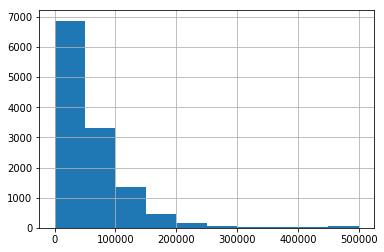

In [40]:
X = responses_only_filtered.drop('Q9', axis=1)
Y = responses_only_filtered['Q9']
Y.hist()

In [41]:
X.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q23,Q24,Q25,Q26
1,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan to learn in the future,Definitely not


### Encoding all categorical data as nominal using dummy (one-hot) encoding

In [42]:
X_oh = pd.get_dummies(X)
print("One-hot encooded input X has {0} features.".format(len(X_oh.columns)))
X_oh.head(5)

One-hot encooded input X has 179 features.


,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,Q2_55-59,Q2_60-69,Q2_70-79,Q2_80+,Q3_Argentina,Q3_Australia,Q3_Austria,Q3_Bangladesh,Q3_Belarus,Q3_Belgium,Q3_Brazil,Q3_Canada,Q3_Chile,Q3_China,Q3_Colombia,Q3_Czech Republic,Q3_Denmark,Q3_Egypt,Q3_Finland,Q3_France,Q3_Germany,Q3_Greece,Q3_Hong Kong (S.A.R.),Q3_Hungary,Q3_I do not wish to disclose my location,Q3_India,Q3_Indonesia,"Q3_Iran, Islamic Republic of...",Q3_Ireland,Q3_Israel,Q3_Italy,Q3_Japan,Q3_Kenya,Q3_Malaysia,Q3_Mexico,Q3_Morocco,Q3_Netherlands,Q3_New Zealand,Q3_Nigeria,Q3_Norway,Q3_Other,Q3_Pakistan,Q3_Peru,Q3_Philippines,Q3_Poland,Q3_Portugal,Q3_Republic of Korea,Q3_Romania,Q3_Russia,Q3_Singapore,Q3_South Africa,Q3_South Korea,Q3_Spain,Q3_Sweden,Q3_Switzerland,Q3_Thailand,Q3_Tunisia,Q3_Turkey,Q3_Ukraine,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q3_Viet Nam,Q4_Bachelor’s degree,Q4_Doctoral degree,Q4_I prefer not to answer,Q4_Master’s degree,Q4_No formal education past high school,Q4_Professional degree,Q4_Some college/university study without earning a bachelor’s degree,"Q5_A business discipline (accounting, economics, finance, etc.)","Q5_Computer science (software engineering, etc.)",Q5_Engineering (non-computer focused),Q5_Environmental science or geology,Q5_Fine arts or performing arts,"Q5_Humanities (history, literature, philosophy, etc.)",Q5_I never declared a major,"Q5_Information technology, networking, or system administration",Q5_Mathematics or statistics,"Q5_Medical or life sciences (biology, chemistry, medicine, etc.)",Q5_Other,Q5_Physics or astronomy,"Q5_Social sciences (anthropology, psychology, sociology, etc.)",Q6_Business Analyst,Q6_Chief Officer,Q6_Consultant,Q6_DBA/Database Engineer,Q6_Data Analyst,Q6_Data Engineer,Q6_Data Journalist,Q6_Data Scientist,Q6_Developer Advocate,Q6_Manager,Q6_Marketing Analyst,Q6_Other,Q6_Principal Investigator,Q6_Product/Project Manager,Q6_Research Assistant,Q6_Research Scientist,Q6_Salesperson,Q6_Software Engineer,Q6_Statistician,Q7_Academics/Education,Q7_Accounting/Finance,Q7_Broadcasting/Communications,Q7_Computers/Technology,Q7_Energy/Mining,Q7_Government/Public Service,Q7_Hospitality/Entertainment/Sports,Q7_Insurance/Risk Assessment,Q7_Manufacturing/Fabrication,Q7_Marketing/CRM,Q7_Medical/Pharmaceutical,Q7_Military/Security/Defense,Q7_Non-profit/Service,Q7_Online Business/Internet-based Sales,Q7_Online Service/Internet-based Services,Q7_Other,Q7_Retail/Sales,Q7_Shipping/Transportation,Q8_0-1,Q8_1-2,Q8_10-15,Q8_15-20,Q8_2-3,Q8_20-25,Q8_25-30,Q8_3-4,Q8_30 +,Q8_4-5,Q8_5-10,Q10_I do not know,Q10_No (we do not use ML methods),Q10_We are exploring ML methods (and may one day put a model into production),"Q10_We have well established ML methods (i.e., models in production for more than 2 years)","Q10_We recently started using ML methods (i.e., models in production for less than 2 years)",Q10_We use ML methods for generating insights (but do not put working models into production),Q23_0% of my time,Q23_1% to 25% of my time,Q23_100% of my time,Q23_25% to 49% of my time,Q23_50% to 74% of my time,Q23_75% to 99% of my time,Q24_1-2 years,Q24_10-20 years,Q24_20-30 years,Q24_3-5 years,Q24_30-40 years,Q24_40+ years,Q24_5-10 years,Q24_< 1 year,Q24_I have never written code and I do not want to learn,Q24_I have never written code but I want to learn,Q25_1-2 years,Q25_10-15 years,Q25_2-3 years,Q25_20+ years,Q25_3-4 years,Q25_4-5 years,Q25_5-10 years,Q25_< 1 year,Q25_I have never studied machine learning and I do not plan to,Q25_I have never studied machine learning but plan to learn in the future,Q26_Definitely not,Q26_Definitely yes,Q26_Maybe,Q26_Probably not,Q26_Probably yes
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [43]:
X_oh.head()

,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,Q2_55-59,Q2_60-69,Q2_70-79,Q2_80+,Q3_Argentina,Q3_Australia,Q3_Austria,Q3_Bangladesh,Q3_Belarus,Q3_Belgium,Q3_Brazil,Q3_Canada,Q3_Chile,Q3_China,Q3_Colombia,Q3_Czech Republic,Q3_Denmark,Q3_Egypt,Q3_Finland,Q3_France,Q3_Germany,Q3_Greece,Q3_Hong Kong (S.A.R.),Q3_Hungary,Q3_I do not wish to disclose my location,Q3_India,Q3_Indonesia,"Q3_Iran, Islamic Republic of...",Q3_Ireland,Q3_Israel,Q3_Italy,Q3_Japan,Q3_Kenya,Q3_Malaysia,Q3_Mexico,Q3_Morocco,Q3_Netherlands,Q3_New Zealand,Q3_Nigeria,Q3_Norway,Q3_Other,Q3_Pakistan,Q3_Peru,Q3_Philippines,Q3_Poland,Q3_Portugal,Q3_Republic of Korea,Q3_Romania,Q3_Russia,Q3_Singapore,Q3_South Africa,Q3_South Korea,Q3_Spain,Q3_Sweden,Q3_Switzerland,Q3_Thailand,Q3_Tunisia,Q3_Turkey,Q3_Ukraine,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q3_Viet Nam,Q4_Bachelor’s degree,Q4_Doctoral degree,Q4_I prefer not to answer,Q4_Master’s degree,Q4_No formal education past high school,Q4_Professional degree,Q4_Some college/university study without earning a bachelor’s degree,"Q5_A business discipline (accounting, economics, finance, etc.)","Q5_Computer science (software engineering, etc.)",Q5_Engineering (non-computer focused),Q5_Environmental science or geology,Q5_Fine arts or performing arts,"Q5_Humanities (history, literature, philosophy, etc.)",Q5_I never declared a major,"Q5_Information technology, networking, or system administration",Q5_Mathematics or statistics,"Q5_Medical or life sciences (biology, chemistry, medicine, etc.)",Q5_Other,Q5_Physics or astronomy,"Q5_Social sciences (anthropology, psychology, sociology, etc.)",Q6_Business Analyst,Q6_Chief Officer,Q6_Consultant,Q6_DBA/Database Engineer,Q6_Data Analyst,Q6_Data Engineer,Q6_Data Journalist,Q6_Data Scientist,Q6_Developer Advocate,Q6_Manager,Q6_Marketing Analyst,Q6_Other,Q6_Principal Investigator,Q6_Product/Project Manager,Q6_Research Assistant,Q6_Research Scientist,Q6_Salesperson,Q6_Software Engineer,Q6_Statistician,Q7_Academics/Education,Q7_Accounting/Finance,Q7_Broadcasting/Communications,Q7_Computers/Technology,Q7_Energy/Mining,Q7_Government/Public Service,Q7_Hospitality/Entertainment/Sports,Q7_Insurance/Risk Assessment,Q7_Manufacturing/Fabrication,Q7_Marketing/CRM,Q7_Medical/Pharmaceutical,Q7_Military/Security/Defense,Q7_Non-profit/Service,Q7_Online Business/Internet-based Sales,Q7_Online Service/Internet-based Services,Q7_Other,Q7_Retail/Sales,Q7_Shipping/Transportation,Q8_0-1,Q8_1-2,Q8_10-15,Q8_15-20,Q8_2-3,Q8_20-25,Q8_25-30,Q8_3-4,Q8_30 +,Q8_4-5,Q8_5-10,Q10_I do not know,Q10_No (we do not use ML methods),Q10_We are exploring ML methods (and may one day put a model into production),"Q10_We have well established ML methods (i.e., models in production for more than 2 years)","Q10_We recently started using ML methods (i.e., models in production for less than 2 years)",Q10_We use ML methods for generating insights (but do not put working models into production),Q23_0% of my time,Q23_1% to 25% of my time,Q23_100% of my time,Q23_25% to 49% of my time,Q23_50% to 74% of my time,Q23_75% to 99% of my time,Q24_1-2 years,Q24_10-20 years,Q24_20-30 years,Q24_3-5 years,Q24_30-40 years,Q24_40+ years,Q24_5-10 years,Q24_< 1 year,Q24_I have never written code and I do not want to learn,Q24_I have never written code but I want to learn,Q25_1-2 years,Q25_10-15 years,Q25_2-3 years,Q25_20+ years,Q25_3-4 years,Q25_4-5 years,Q25_5-10 years,Q25_< 1 year,Q25_I have never studied machine learning and I do not plan to,Q25_I have never studied machine learning but plan to learn in the future,Q26_Definitely not,Q26_Definitely yes,Q26_Maybe,Q26_Probably not,Q26_Probably yes
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [44]:
X_oh.shape

(12364, 179)

#### Correlations between features and the target variable for label encoding of input

Particular country, job title, work experience, and education seem to be correlated the most with the target, which appears to be reasonable.

In [45]:
X_oh_with_target = pd.concat([X_oh, Y], axis=1)

In [46]:
X_oh_with_target.corr()['Q9'].sort_values(ascending=False).iloc[:20]

Q9                                                                                            1.000000
Q3_United States of America                                                                   0.447166
Q10_We have well established ML methods (i.e., models in production for more than 2 years)    0.196735
Q24_10-20 years                                                                               0.192123
Q6_Chief Officer                                                                              0.154293
Q25_5-10 years                                                                                0.151103
Q25_20+ years                                                                                 0.147423
Q24_20-30 years                                                                               0.141814
Q24_5-10 years                                                                                0.138882
Q8_30 +                                                                  

### Fitting Variance Threshold feature selection algorithm on one-hot dummies

In [47]:
from sklearn.feature_selection import VarianceThreshold

variance_threshold = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_oh_vt = variance_threshold.fit_transform(X_oh)
print("Shape before transformation:", X_oh.shape)
print("Shape after the transformation:", X_oh_vt.shape)

Shape before transformation: (12364, 179)
Shape after the transformation: (12364, 20)


In [48]:
X_oh_vt_with_target = pd.concat([pd.DataFrame(X_oh_vt), Y], axis=1)

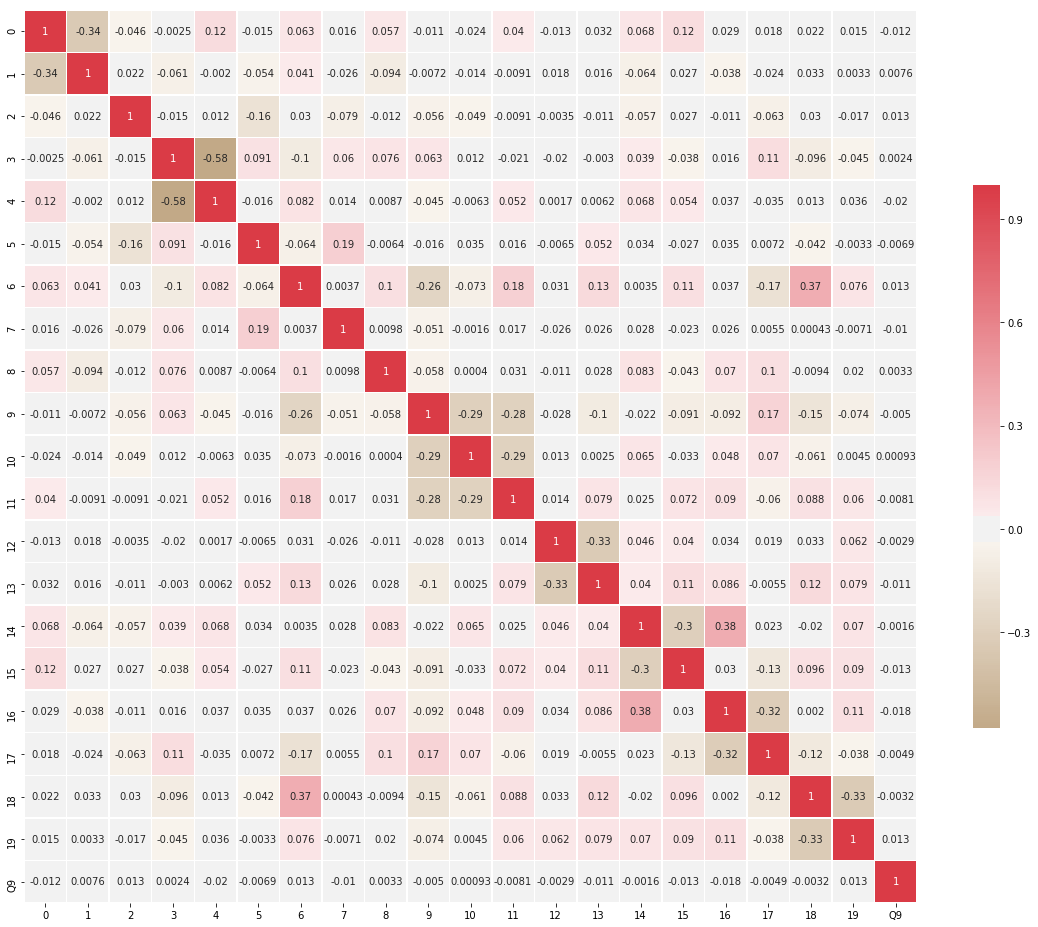

In [49]:
plot_heatmap(X_oh_vt_with_target.corr())

### Encoding all categorical data using `LabelEncoder` from `scikit-learn`

In [50]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
def label_encode(col):
    col = labelencoder.fit_transform(col)
    return col

In [51]:
X_lab = X.apply(lambda col: label_encode(col.astype('str')))
print("Label-encooded input X has {0} features.".format(len(X_lab.columns)))
X_lab.head(5)

Label-encooded input X has 13 features.


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q23,Q24,Q25,Q26
1,1,3,22,0,2,11,8,10,1,1,9,9,0
4,1,4,8,1,7,11,0,2,1,3,7,7,3
5,1,0,21,3,7,11,15,0,4,5,7,7,3
6,1,3,19,3,2,17,14,7,3,5,0,7,3
7,1,5,56,3,2,7,15,10,4,5,6,6,2


#### Correlations between features and the target variable for label encoding of input

There appears to be some moderate correlation between questions Q23, Q24, Q25, and Q26 (regarding experience in coding and ML, % of time spent coding, and  if respondents consider themselves to be Data Scientists), which appears to be reasonable.

In terms of the target, questions Q1 (gender), Q2 (age), Q3 (country), Q5(undergraduate major), and Q7(industry) show some positive correlation with the target when using nominal labels.

In [52]:
X_lab_with_target = pd.concat([X_lab, Y], axis=1)

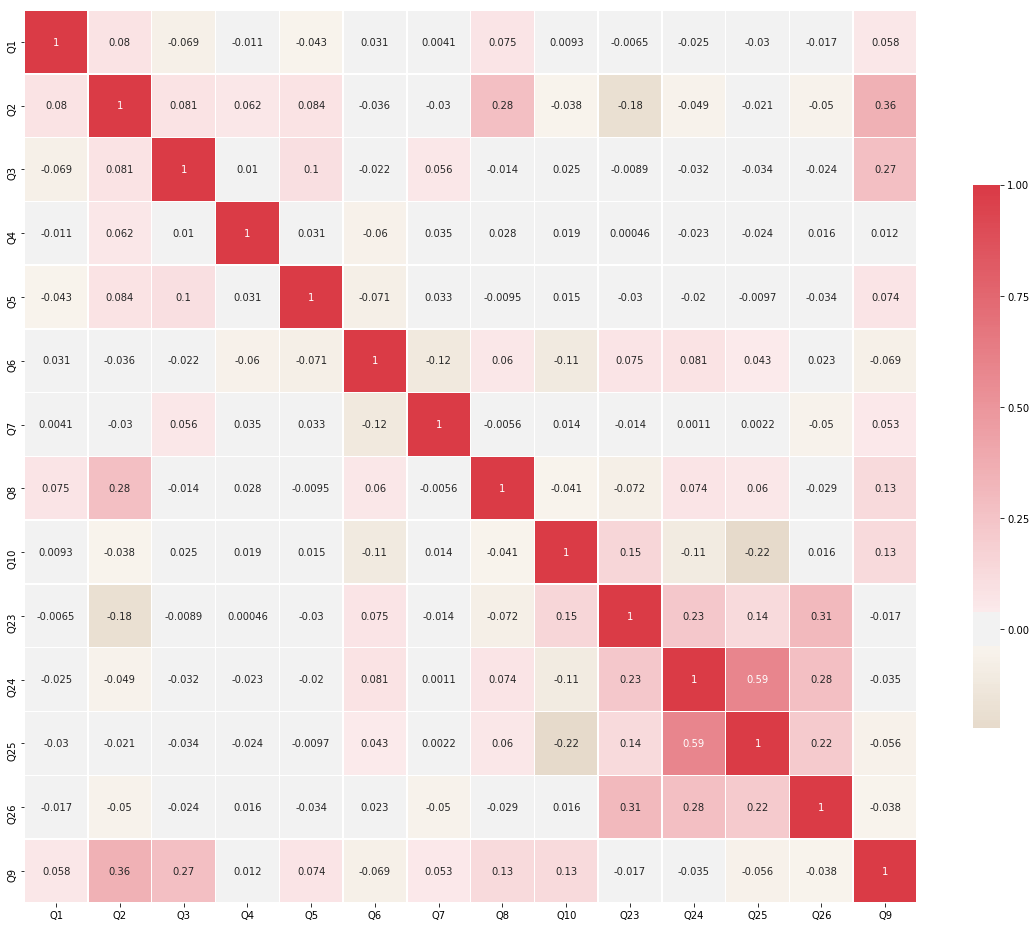

In [53]:
plot_heatmap(X_lab_with_target.corr())

However, Q8 (years of experience), Q10 (use of ML by employer), Q23-Q26 **contain ordinal data** that is not represented properly by nomimal labels. Performance of these features can further be improved, if they are encoded using ordinal encoding.

In [54]:
X['Q26'].value_counts()

Definitely yes    3161
Probably yes      2947
Maybe             2273
Probably not      1756
Definitely not    915 
Name: Q26, dtype: int64

In [55]:
X_lab['Q26'].value_counts()

1    3161
4    2947
2    2273
3    1756
5    1312
0    915 
Name: Q26, dtype: int64

## Modeling

### Linear models vs ensembles

When trying to predict a variable, there are **three main sources for error in predictions: noise, variance, and bias.

Effects from these factors **can be reduced** (except for noise, which is an irreducible factor) **by utilizing ensembles**. An ensemble is a **collection of predictors that come together to give a final prediction** (e.g., mean of all predictions). 

Ensembling techniques are classified into **bagging** and **boosting**:

* **Bagging** is a technique of **combining many independent predictors** using an averaging technique (average, weighted average, normal average, majority vote, _etc._) **Random forest** is an example of a bagging ensemble.

    * bagging **can help reduce model overfitting** and reduce variance


* **Boosting** is an ensemble technique in which predictors instead of being combined independently, are **combined sequetntially**, so that subsequent predictors can learn from the mistakes of previous predictors. **Gradient boosting** is an example of a boosting algorithm.

    * gradient boosting can reduce bias and variance, but **can cause stronger overfitting**
    
    * can **take longer to compute**, since models need to work sequentially

### Model evaluation using k-fold cross validation

In this section 

Model evaluation is performed using k-fold Cross Validation (CV) technique.

In this basic approach, the training set is split into $k$ smaller sets. The following procedure is followed for each of the $k$ “folds”:

* A model is trained using $k-1$ of the folds as training data;

* the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

Following metrics are used to assess model performance:

* r2 score -- coefficient of determination (best possible is 1)

* Mean Absolute Error (MAE)

* Root of Mean Squared Error (RMSE)

In [70]:
input_sets = dict(one_hot=X_oh, one_hot_var_threshold=X_oh_vt, nom_lab=X_lab)
test_size = 0.33
random_seed = 25
learning_rate = 0.1
num_folds = 10

### Ensemble -- Gradient boosting regressor

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

model_name = "Gradient-boosting regressor"

y_train, y_test = train_test_split(Y, test_size=test_size, random_state=random_seed)

for set_name, input_set in input_sets.items():

    print("------------------------------------------------------------------------")
    print("\n--- FITTING --- {0} model --- on input set '{1}'"
          .format(model_name, set_name))

    # split data into train and test
    X_train, X_test,  = train_test_split(input_set,
                                         test_size=test_size,
                                         random_state=random_seed)
    
    model = GradientBoostingRegressor(learning_rate=learning_rate,
                                   max_depth=5)

    model.fit(X_train, y_train)
    training_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

    print("--- Training score for input set X", set_name)
    print("Cross-validation accuracy scores:\n", training_scores)

    scores_mean = training_scores.mean()
    var = ((training_scores - scores_mean) ** 2)
    print("Model variance:", var)
    
    # assess model predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_train = r2_score(y_train, predictions_train) # can try mean absolute error instead
    r2_test = r2_score(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel r2 score on the train set:", r2_train)
    print("Model r2 score on the test set:", r2_test)
    
    mae_train = mean_absolute_error(y_train, predictions_train) # can try mean absolute error instead
    mae_test = mean_absolute_error(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel mean absolute error on the train set:", mae_train)
    print("Model mean absolute error on the test set:", mae_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train)) # can try mean absolute error instead
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test)) # can try mean absolute error instead
    print("\nModel RMSE on the train set:", rmse_train)
    print("Model RMSE on the test set:", rmse_test)
    
    explained_variance_train = explained_variance_score(y_train, predictions_train)
    explained_variance_test = explained_variance_score(y_test, predictions_test)
    print("\nModel explained variance score on the train set:", explained_variance_train)
    print("Model explained variance score on the test set:", explained_variance_test)
    
    print("\n--------- Test score for input set X:", model.score(X_test, y_test))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------

--- FITTING --- Gradient-boosting regressor model --- on input set 'one_hot'
--- Training score for input set X one_hot
Cross-validation accuracy scores:
 [0.46161806 0.37638099 0.36208551 0.44953619 0.37311025 0.42404377
 0.51360179 0.36076186 0.403139   0.36373931]
Model variance: [2.78957115e-03 1.05110076e-03 2.18240000e-03 1.65930078e-03
 1.27387769e-03 2.32321620e-04 1.09830643e-02 2.30782360e-03
 3.20658900e-05 2.03061663e-03]

Model r2 score on the train set: 0.6532343170565957
Model r2 score on the test set: 0.44568302679788263

Model mean absolute error on the train set: 22504.79419088439
Model mean absolute error on the test set: 26638.370565057714

Model RMSE on the train set: 38546.001320482006
Model RMSE on the test set: 46592.896991547175

Model explained variance score on the train set: 0.6532343170565957
Model explained variance score on the test set: 0.4461393397444785

--------- Test score for 

Gradient Boosted Regressor shows the best test score of 0.461 for nominally labeled inputs. 

The model seems to have high bias on one-hot Variance Threshold reduced imput, as it performs equally mediocre on training and test data. For unreduced one hot and label encoding, model seems to be overfitting on the train data, as the errors appear be higher during testing.

### Ensemble -- Random forest regressor

Random Forest is another example of an ensemble learning method. It operates by constructing a multitude of decision trees and outputs the mean of predictions coming from individual trees.

In [72]:
model_name = "Random Forest regressor"

y_train, y_test = train_test_split(Y, test_size=test_size, random_state=random_seed)

for set_name, input_set in input_sets.items():

    print("------------------------------------------------------------------------")
    print("\n--- FITTING --- {0} model --- on input set '{1}'"
          .format(model_name, set_name))

    # split data into train and test
    X_train, X_test,  = train_test_split(input_set,
                                         test_size=test_size,
                                         random_state=random_seed)
    
    model = RandomForestRegressor()

    model.fit(X_train, y_train)
    training_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

    print("--- Training score for input set X", set_name)
    print("Cross-validation accuracy scores:\n", training_scores)

    scores_mean = training_scores.mean()
    var = ((training_scores - scores_mean) ** 2)
    print("Model variance:", var)
    
    # assess model predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_train = r2_score(y_train, predictions_train) # can try mean absolute error instead
    r2_test = r2_score(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel r2 score on the train set:", r2_train)
    print("Model r2 score on the test set:", r2_test)
    
    mae_train = mean_absolute_error(y_train, predictions_train) # can try mean absolute error instead
    mae_test = mean_absolute_error(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel mean absolute error on the train set:", mae_train)
    print("Model mean absolute error on the test set:", mae_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train)) # can try mean absolute error instead
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test)) # can try mean absolute error instead
    print("\nModel RMSE on the train set:", rmse_train)
    print("Model RMSE on the test set:", rmse_test)
    
    explained_variance_train = explained_variance_score(y_train, predictions_train)
    explained_variance_test = explained_variance_score(y_test, predictions_test)
    print("\nModel explained variance score on the train set:", explained_variance_train)
    print("Model explained variance score on the test set:", explained_variance_test)
    
    print("\n--------- Test score for input set X:", model.score(X_test, y_test))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------

--- FITTING --- Random Forest regressor model --- on input set 'one_hot'


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


--- Training score for input set X one_hot
Cross-validation accuracy scores:
 [0.37146549 0.32249035 0.22776606 0.38164789 0.33191941 0.37342493
 0.35037692 0.31934044 0.3181353  0.3078807 ]
Model variance: [1.68270086e-03 6.32724790e-05 1.05429132e-02 2.62176184e-03
 2.17463087e-06 1.84729592e-03 3.97291520e-04 1.23305754e-04
 1.51522438e-04 5.09136335e-04]

Model r2 score on the train set: 0.8842066383624099
Model r2 score on the test set: 0.36866309069951764

Model mean absolute error on the train set: 11447.37957463077
Model mean absolute error on the test set: 28448.648754390262

Model RMSE on the train set: 22274.250895327634
Model RMSE on the test set: 49724.59055826902

Model explained variance score on the train set: 0.8842081493892705
Model explained variance score on the test set: 0.3686915458139811

--------- Test score for input set X: 0.36866309069951764
------------------------------------------------------------------------
----------------------------------------------

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


--- Training score for input set X one_hot_var_threshold
Cross-validation accuracy scores:
 [ 0.09255289 -0.04935048  0.10152191  0.18908405  0.1592765   0.03395125
  0.04386855  0.14224009  0.05866226  0.13830091]
Model variance: [2.37806272e-06 1.97012872e-02 1.10483587e-04 9.61836291e-03
 4.66020678e-03 3.25579140e-03 2.22239082e-03 2.62444133e-03
 1.04642758e-03 2.23635489e-03]

Model r2 score on the train set: 0.6590617798514815
Model r2 score on the test set: 0.07469652565862173

Model mean absolute error on the train set: 21235.833502286838
Model mean absolute error on the test set: 38015.44130583237

Model RMSE on the train set: 38220.74260593541
Model RMSE on the test set: 60198.09143140827

Model explained variance score on the train set: 0.6595884225423221
Model explained variance score on the test set: 0.08020101719718542

--------- Test score for input set X: 0.07469652565862173
------------------------------------------------------------------------
----------------------

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


--- Training score for input set X nom_lab
Cross-validation accuracy scores:
 [0.30301521 0.23458327 0.26806887 0.34375658 0.29009921 0.26434161
 0.39478925 0.24908222 0.27996301 0.19748696]
Model variance: [4.20110343e-04 2.29779802e-03 2.08795391e-04 3.75008835e-03
 5.74653524e-05 3.30403802e-04 1.26046950e-02 1.11799293e-03
 6.53112231e-06 7.23038235e-03]

Model r2 score on the train set: 0.860094197928365
Model r2 score on the test set: 0.29646115915352655

Model mean absolute error on the train set: 13038.170820757374
Model mean absolute error on the test set: 31514.310394919547

Model RMSE on the train set: 24483.817794847866
Model RMSE on the test set: 52490.978090090175

Model explained variance score on the train set: 0.8605480359864581
Model explained variance score on the test set: 0.3025754218025868

--------- Test score for input set X: 0.29646115915352655
------------------------------------------------------------------------


Random Forest Regressor shows significantly worse results then Gradient Boosting Regressor, with best test score of 0.368 for one-hot encoded inputs. There is extreme overfitting, as the model performs much better on the training data then it does on the test. This is a surprising result, as Random Forest Regressor is a bagging ensemble modeling technique, which are supposed to reduce overfitting. Improvement of Random Forest Regressor performance will be attempted as part of hyperparameter tuning in the following section.

### Linear -- Ridge regression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization.

In [73]:
model_name = "Ridge regressor"

y_train, y_test = train_test_split(Y, test_size=test_size, random_state=random_seed)

for set_name, input_set in input_sets.items():

    print("------------------------------------------------------------------------")
    print("\n--- FITTING --- {0} model --- on input set '{1}'"
          .format(model_name, set_name))

    # split data into train and test
    X_train, X_test,  = train_test_split(input_set,
                                         test_size=test_size,
                                         random_state=random_seed)
    
    model = Ridge(alpha=1.0)

    model.fit(X_train, y_train)
    training_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

    print("--- Training score for input set X", set_name)
    print("Cross-validation accuracy scores:\n", training_scores)

    scores_mean = training_scores.mean()
    var = ((training_scores - scores_mean) ** 2)
    print("Model variance:", var)
    
    # assess model predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_train = r2_score(y_train, predictions_train) # can try mean absolute error instead
    r2_test = r2_score(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel r2 score on the train set:", r2_train)
    print("Model r2 score on the test set:", r2_test)
    
    mae_train = mean_absolute_error(y_train, predictions_train) # can try mean absolute error instead
    mae_test = mean_absolute_error(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel mean absolute error on the train set:", mae_train)
    print("Model mean absolute error on the test set:", mae_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train)) # can try mean absolute error instead
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test)) # can try mean absolute error instead
    print("\nModel RMSE on the train set:", rmse_train)
    print("Model RMSE on the test set:", rmse_test)
    
    explained_variance_train = explained_variance_score(y_train, predictions_train)
    explained_variance_test = explained_variance_score(y_test, predictions_test)
    print("\nModel explained variance score on the train set:", explained_variance_train)
    print("Model explained variance score on the test set:", explained_variance_test)
    
    print("\n--------- Test score for input set X:", model.score(X_test, y_test))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------

--- FITTING --- Ridge regressor model --- on input set 'one_hot'
--- Training score for input set X one_hot
Cross-validation accuracy scores:
 [0.46874672 0.3914855  0.39883562 0.46427872 0.39319866 0.39774553
 0.56583156 0.41429248 0.41930816 0.38346186]
Model variance: [0.0015232  0.00146176 0.00095375 0.00119441 0.0013337  0.00102227
 0.01852677 0.00023796 0.00010837 0.00213967]

Model r2 score on the train set: 0.4623789847049333
Model r2 score on the test set: 0.45733663308599437

Model mean absolute error on the train set: 26631.890155296896
Model mean absolute error on the test set: 26839.943048936322

Model RMSE on the train set: 47995.375568898104
Model RMSE on the test set: 46100.52575506927

Model explained variance score on the train set: 0.4623789847049333
Model explained variance score on the test set: 0.4574741602656214

--------- Test score for input set X: 0.45733663308599437
--------------------

Ridge Regressor shows results similar to Gradient Boosting Regressor, with the best model test score of 0.457 for one-hot encoded input. There seems to be no overfitting for all inputs, nominally encoded inputs produce higher bias with high errors on both training and test.

### Linear regression

Linear regression is the simplest and most widely used statistical technique for predictive modeling. It assumes the output to be a simple weighted sum of the inputs.

In [74]:
model_name = "Linear regression"

y_train, y_test = train_test_split(Y, test_size=test_size, random_state=random_seed)

for set_name, input_set in input_sets.items():

    print("------------------------------------------------------------------------")
    print("\n--- FITTING --- {0} model --- on input set '{1}'"
          .format(model_name, set_name))

    # split data into train and test
    X_train, X_test,  = train_test_split(input_set,
                                         test_size=test_size,
                                         random_state=random_seed)
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    training_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

    print("--- Training score for input set X", set_name)
    print("Cross-validation accuracy scores:\n", training_scores)

    scores_mean = training_scores.mean()
    var = ((training_scores - scores_mean) ** 2)
    print("Model variance:", var)
    
    # assess model predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_train = r2_score(y_train, predictions_train) # can try mean absolute error instead
    r2_test = r2_score(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel r2 score on the train set:", r2_train)
    print("Model r2 score on the test set:", r2_test)
    
    mae_train = mean_absolute_error(y_train, predictions_train) # can try mean absolute error instead
    mae_test = mean_absolute_error(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel mean absolute error on the train set:", mae_train)
    print("Model mean absolute error on the test set:", mae_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train)) # can try mean absolute error instead
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test)) # can try mean absolute error instead
    print("\nModel RMSE on the train set:", rmse_train)
    print("Model RMSE on the test set:", rmse_test)
    
    explained_variance_train = explained_variance_score(y_train, predictions_train)
    explained_variance_test = explained_variance_score(y_test, predictions_test)
    print("\nModel explained variance score on the train set:", explained_variance_train)
    print("Model explained variance score on the test set:", explained_variance_test)
    
    print("\n--------- Test score for input set X:", model.score(X_test, y_test))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------

--- FITTING --- Linear regression model --- on input set 'one_hot'
--- Training score for input set X one_hot
Cross-validation accuracy scores:
 [0.46595375 0.39072685 0.39843977 0.45945278 0.39330169 0.39768798
 0.56859926 0.4140169  0.41841256 0.37803904]
Model variance: [0.00140555 0.00142402 0.0009014  0.00096036 0.00123632 0.00094711
 0.01963816 0.00020869 0.00010101 0.00254258]

Model r2 score on the train set: 0.46266368634084876
Model r2 score on the test set: 0.4563608599216401

Model mean absolute error on the train set: 26627.52034287094
Model mean absolute error on the test set: 26857.417544719432

Model RMSE on the train set: 47982.665712837756
Model RMSE on the test set: 46141.95424951645

Model explained variance score on the train set: 0.4626637044374874
Model explained variance score on the test set: 0.45649314679952846

--------- Test score for input set X: 0.4563608599216401
-------------------

Linear regression shows similar results to Ridge Regressor and Gradient Boosting Regressor, with the best model test score of 0.456 for one one-hot encoded inputs. There seems to be no overfitting for all inputs, nominally encoded inputs produce higher bias with high errors on both training and test.

## Hyperparameter tuning

Hyper-parameters are parameters that are not directly learnt within estimators. In `scikit-learn` they are passed as arguments to the constructor of the estimator classes. Any parameter provided when constructing an estimator may be optimized in this manner.

Two generic approaches to sampling search candidates are provided in `scikit-learn`: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.

`GridSearchCV` will be used to tune model performance: the grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter.

### Tuning Gradient Boosting Regressor

Grid Search Cross-Validation was performed for Gradient Boosting Regressor by variating the following parameters:

* `learning rate`: 0.05, 0.1, 0.2, 0.3, 0.5

* `max_depth`: 2, 3, 5, 7

* `random_state`: 25

The following optimal parameters were obtained:

In [75]:
gr_best_learning_rate = 0.3

In [76]:
gr_best_max_depth = 2

#### Rerunning Gradient Boosting Regressor using optimized hyperparameters

Gradient Boosting Regressor shows reduced overfitting, but no improvement in accuracy with optimized hyperparameters.

In [77]:
input_sets = dict(one_hot=X_oh, one_hot_var_threshold=X_oh_vt, nom_lab=X_lab)
test_size = 0.33
random_seed = 25
num_folds = 10

learning_rate = gr_best_learning_rate
max_depth = gr_best_max_depth

In [78]:
model_name = "Gradient-boosting regressor"

y_train, y_test = train_test_split(Y, test_size=test_size, random_state=random_seed)

for set_name, input_set in input_sets.items():

    print("------------------------------------------------------------------------")
    print("\n--- FITTING --- {0} model --- on input set '{1}'"
          .format(model_name, set_name))

    # split data into train and test
    X_train, X_test,  = train_test_split(input_set,
                                         test_size=test_size,
                                         random_state=random_seed)
    
    model = GradientBoostingRegressor(learning_rate=learning_rate,
                                   max_depth=max_depth)

    model.fit(X_train, y_train)
    training_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

    print("--- Training score for input set X", set_name)
    print("Cross-validation accuracy scores:\n", training_scores)

    scores_mean = training_scores.mean()
    var = ((training_scores - scores_mean) ** 2)
    print("Model variance:", var)
    
    # assess model predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_train = r2_score(y_train, predictions_train) # can try mean absolute error instead
    r2_test = r2_score(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel r2 score on the train set:", r2_train)
    print("Model r2 score on the test set:", r2_test)
    
    mae_train = mean_absolute_error(y_train, predictions_train) # can try mean absolute error instead
    mae_test = mean_absolute_error(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel mean absolute error on the train set:", mae_train)
    print("Model mean absolute error on the test set:", mae_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train)) # can try mean absolute error instead
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test)) # can try mean absolute error instead
    print("\nModel RMSE on the train set:", rmse_train)
    print("Model RMSE on the test set:", rmse_test)
    
    explained_variance_train = explained_variance_score(y_train, predictions_train)
    explained_variance_test = explained_variance_score(y_test, predictions_test)
    print("\nModel explained variance score on the train set:", explained_variance_train)
    print("Model explained variance score on the test set:", explained_variance_test)
    
    print("\n--------- Test score for input set X:", model.score(X_test, y_test))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------

--- FITTING --- Gradient-boosting regressor model --- on input set 'one_hot'
--- Training score for input set X one_hot
Cross-validation accuracy scores:
 [0.46392916 0.38073996 0.39686981 0.45964867 0.39070365 0.4257377
 0.478701   0.38408123 0.42254621 0.3734493 ]
Model variance: [2.14262407e-03 1.36166227e-03 4.31428418e-04 1.76467255e-03
 7.25602869e-04 6.55618475e-05 3.72836440e-03 1.12623605e-03
 2.40642956e-05 1.95287729e-03]

Model r2 score on the train set: 0.5184899784008197
Model r2 score on the test set: 0.45373428074498046

Model mean absolute error on the train set: 25312.472382894066
Model mean absolute error on the test set: 26562.842027917362

Model RMSE on the train set: 45421.75823008935
Model RMSE on the test set: 46253.286796772874

Model explained variance score on the train set: 0.5184899784008197
Model explained variance score on the test set: 0.4541270360744526

--------- Test score for i

Tuning Gradient Boosting Regressor hyperparameters did reduce model overfitting, but did not improve accuracy on test data.

### Tuning Random Forest regressor

Grid Search Cross-Validation was performed for Random Forest Regressor by variating the following parameters:

* `n_estimators`: 100, 200, 300

* `max_features`: 5, 10

* `max_depth`: 20, 30

* `bootstrap`: True, False

* `max_depth`: 2, 3, 5, 7

* `random_state`: 25

The following optimal parameters were obtained:

In [79]:
rf_best_n_estimators = 300
rf_best_max_features = 10
rf_best_max_depth = 30
rf_best_bootstrap = False

#### Rerunning Random Forest Regressor with optimized parameters

Random Forest Regressor shows a significant improvement in accuracy when compared to model settings that were attempted initially for one-hot encoded input. However, it still underperforms when compared to other models, and model overfitting became even stronger with grid-search-optimized parameters.

In [80]:
input_sets = dict(one_hot=X_oh, one_hot_var_threshold=X_oh_vt, nom_lab=X_lab)
test_size = 0.33
random_seed = 25
num_folds = 10

rf_n_estimators = rf_best_n_estimators
rf_max_depth = rf_best_max_depth
rf_max_features = rf_best_max_features
rf_bootstrap = rf_best_bootstrap

In [81]:
model_name = "Optimized Random Forest Regressor"

y_train, y_test = train_test_split(Y, test_size=test_size, random_state=random_seed)

for set_name, input_set in input_sets.items():

    print("------------------------------------------------------------------------")
    print("\n--- FITTING --- {0} model --- on input set '{1}'"
          .format(model_name, set_name))

    # split data into train and test
    X_train, X_test,  = train_test_split(input_set,
                                         test_size=test_size,
                                         random_state=random_seed)
    
    model = RandomForestRegressor(n_estimators=rf_n_estimators, 
                                  max_depth=rf_max_depth,
                                  max_features=rf_max_features,
                                  bootstrap=rf_bootstrap)

    model.fit(X_train, y_train)
    training_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

    print("--- Training score for input set X", set_name)
    print("Cross-validation accuracy scores:\n", training_scores)

    scores_mean = training_scores.mean()
    var = ((training_scores - scores_mean) ** 2)
    print("Model variance:", var)
    
    # assess model predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_train = r2_score(y_train, predictions_train) # can try mean absolute error instead
    r2_test = r2_score(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel r2 score on the train set:", r2_train)
    print("Model r2 score on the test set:", r2_test)
    
    mae_train = mean_absolute_error(y_train, predictions_train) # can try mean absolute error instead
    mae_test = mean_absolute_error(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel mean absolute error on the train set:", mae_train)
    print("Model mean absolute error on the test set:", mae_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train)) # can try mean absolute error instead
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test)) # can try mean absolute error instead
    print("\nModel RMSE on the train set:", rmse_train)
    print("Model RMSE on the test set:", rmse_test)
    
    explained_variance_train = explained_variance_score(y_train, predictions_train)
    explained_variance_test = explained_variance_score(y_test, predictions_test)
    print("\nModel explained variance score on the train set:", explained_variance_train)
    print("Model explained variance score on the test set:", explained_variance_test)
    
    print("\n--------- Test score for input set X:", model.score(X_test, y_test))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------

--- FITTING --- Optimized Random Forest Regressor model --- on input set 'one_hot'
--- Training score for input set X one_hot
Cross-validation accuracy scores:
 [0.44556457 0.38898526 0.39496725 0.41256753 0.37086997 0.39580189
 0.52325247 0.40397146 0.38549227 0.40154476]
Model variance: [1.10641564e-03 5.43658257e-04 3.00484551e-04 7.06403562e-08
 1.71659153e-03 2.72245305e-04 1.23100648e-02 6.93936672e-05
 7.18748027e-04 1.15712619e-04]

Model r2 score on the train set: 0.9754282196948855
Model r2 score on the test set: 0.44332256200270903

Model mean absolute error on the train set: 6142.4258419928165
Model mean absolute error on the test set: 27576.099714808155

Model RMSE on the train set: 10260.761378843923
Model RMSE on the test set: 46691.99557886288

Model explained variance score on the train set: 0.9754282196948855
Model explained variance score on the test set: 0.44352371428290316

--------- Test sco

Tuning Random Forest Regressor hyperparameters did not reduce model overfitting, but improved accuracy on test data. Best model test score is 0.443 for one-hot encoded inputs.

### Tuning Ridge Regressor

In [82]:
%%time
X_train = input_sets['one_hot']
y_train = Y

model = Ridge()
alpha = [18, 19, 20]
normalize = [True, False]
max_iter = [1, 2, 3, 4, 5]

# Set parameters to iterrate over for 
parameters = {'alpha': alpha,
              'normalize': normalize,
              'max_iter': max_iter}

model_best_fit = GridSearchCV(model,
                              param_grid=parameters,
                              cv=3)\
                                .fit(X_train,y_train)

Wall time: 6.1 s


In [83]:
model_best_fit.best_estimator_.alpha

19

In [84]:
model_best_fit.best_estimator_.normalize

False

In [85]:
model_best_fit.best_estimator_.max_iter

1

#### Rerunning Ridge Regressor using optimized hyperparameters

Ridge Regressor does not show improvement in best accuracy compared to initial model settings, but it was possible to reduce the number of iterations required to achieve the same performance benchmark.

In [86]:
input_sets = dict(one_hot=X_oh, one_hot_var_threshold=X_oh_vt, nom_lab=X_lab)
test_size = 0.33
random_seed = 25
num_folds = 10

r_alpha = model_best_fit.best_estimator_.alpha
r_normalize = model_best_fit.best_estimator_.normalize
r_max_iter = model_best_fit.best_estimator_.max_iter

In [87]:
model_name = "Optimized Ridge Regressor"

y_train, y_test = train_test_split(Y, test_size=test_size, random_state=random_seed)

for set_name, input_set in input_sets.items():

    print("------------------------------------------------------------------------")
    print("\n--- FITTING --- {0} model --- on input set '{1}'"
          .format(model_name, set_name))

    # split data into train and test
    X_train, X_test,  = train_test_split(input_set,
                                         test_size=test_size,
                                         random_state=random_seed)
    
    model = Ridge(alpha=r_alpha,
                  normalize=r_normalize,
                  max_iter=r_max_iter)

    model.fit(X_train, y_train)
    training_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

    print("--- Training score for input set X", set_name)
    print("Cross-validation accuracy scores:\n", training_scores)

    scores_mean = training_scores.mean()
    var = ((training_scores - scores_mean) ** 2)
    print("Model variance:", var)
    
    # assess model predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_train = r2_score(y_train, predictions_train) # can try mean absolute error instead
    r2_test = r2_score(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel r2 score on the train set:", r2_train)
    print("Model r2 score on the test set:", r2_test)
    
    mae_train = mean_absolute_error(y_train, predictions_train) # can try mean absolute error instead
    mae_test = mean_absolute_error(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel mean absolute error on the train set:", mae_train)
    print("Model mean absolute error on the test set:", mae_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train)) # can try mean absolute error instead
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test)) # can try mean absolute error instead
    print("\nModel RMSE on the train set:", rmse_train)
    print("Model RMSE on the test set:", rmse_test)
    
    explained_variance_train = explained_variance_score(y_train, predictions_train)
    explained_variance_test = explained_variance_score(y_test, predictions_test)
    print("\nModel explained variance score on the train set:", explained_variance_train)
    print("Model explained variance score on the test set:", explained_variance_test)
    
    print("\n--------- Test score for input set X:", model.score(X_test, y_test))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------

--- FITTING --- Optimized Ridge Regressor model --- on input set 'one_hot'
--- Training score for input set X one_hot
Cross-validation accuracy scores:
 [0.46355616 0.4004538  0.40198817 0.4679695  0.3917467  0.38937005
 0.53787479 0.41005527 0.42230848 0.40737899]
Model variance: [1.17552767e-03 8.30384239e-04 7.44308747e-04 1.49763668e-03
 1.40801233e-03 1.59202114e-03 1.17949597e-02 3.69213158e-04
 4.84654891e-05 4.79224883e-04]

Model r2 score on the train set: 0.4561691160019665
Model r2 score on the test set: 0.456822881993841

Model mean absolute error on the train set: 26713.375211421724
Model mean absolute error on the test set: 26868.734196533846

Model RMSE on the train set: 48271.76846863336
Model RMSE on the test set: 46122.342772733115

Model explained variance score on the train set: 0.4561691160019664
Model explained variance score on the test set: 0.45700789432442834

--------- Test score for inp

Ridge Regressor does not show improvement in best accuracy compared to initial model settings, but it was possible to reduce the number of iterations required to achieve the same performance benchmark.

### Tuning Linear Regression

In [88]:
%%time
X_train = input_sets['one_hot']
y_train = Y

model = LinearRegression()
fit_intercept = [True, False]
normalize = [True, False]
copy_X = [True, False]
n_jobs = [None, 2, 10]

# Set parameters to iterrate over for 
parameters = {'fit_intercept': fit_intercept,
              'normalize': normalize,
              'copy_X': copy_X,
              'n_jobs': [None, 2, 10]}

model_best_fit = GridSearchCV(model,
                              param_grid=parameters,
                              cv=3)\
                                .fit(X_train,y_train)

Wall time: 5.5 s


In [89]:
model_best_fit.best_estimator_.fit_intercept

False

In [90]:
model_best_fit.best_estimator_.normalize

True

In [91]:
model_best_fit.best_estimator_.copy_X

True

In [92]:
model_best_fit.best_estimator_.n_jobs

#### Rerunning Gradient Boosting Regressor using optimized hyperparameters

Linear regression did not show any improvements after tuning model hyperparameters.

In [93]:
input_sets = dict(one_hot=X_oh, one_hot_var_threshold=X_oh_vt, nom_lab=X_lab)
test_size = 0.33
random_seed = 25
num_folds = 10

lr_fit_intercept = model_best_fit.best_estimator_.fit_intercept
lr_normalize = model_best_fit.best_estimator_.normalize
lr_copy_X = model_best_fit.best_estimator_.copy_X
lr_n_jobs = model_best_fit.best_estimator_.n_jobs

In [94]:
model_name = "Optimized Linear Regression"

y_train, y_test = train_test_split(Y, test_size=test_size, random_state=random_seed)

for set_name, input_set in input_sets.items():

    print("------------------------------------------------------------------------")
    print("\n--- FITTING --- {0} model --- on input set '{1}'"
          .format(model_name, set_name))

    # split data into train and test
    X_train, X_test,  = train_test_split(input_set,
                                         test_size=test_size,
                                         random_state=random_seed)
    
    model = LinearRegression(fit_intercept=lr_fit_intercept,
                             normalize=lr_normalize,
                             copy_X=lr_copy_X,
                             n_jobs=lr_n_jobs)

    model.fit(X_train, y_train)
    training_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

    print("--- Training score for input set X", set_name)
    print("Cross-validation accuracy scores:\n", training_scores)

    scores_mean = training_scores.mean()
    var = ((training_scores - scores_mean) ** 2)
    print("Model variance:", var)
    
    # assess model predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_train = r2_score(y_train, predictions_train) # can try mean absolute error instead
    r2_test = r2_score(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel r2 score on the train set:", r2_train)
    print("Model r2 score on the test set:", r2_test)
    
    mae_train = mean_absolute_error(y_train, predictions_train) # can try mean absolute error instead
    mae_test = mean_absolute_error(y_test, predictions_test) # can try mean absolute error instead
    print("\nModel mean absolute error on the train set:", mae_train)
    print("Model mean absolute error on the test set:", mae_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train)) # can try mean absolute error instead
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test)) # can try mean absolute error instead
    print("\nModel RMSE on the train set:", rmse_train)
    print("Model RMSE on the test set:", rmse_test)
    
    explained_variance_train = explained_variance_score(y_train, predictions_train)
    explained_variance_test = explained_variance_score(y_test, predictions_test)
    print("\nModel explained variance score on the train set:", explained_variance_train)
    print("Model explained variance score on the test set:", explained_variance_test)
    
    print("\n--------- Test score for input set X:", model.score(X_test, y_test))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------

--- FITTING --- Optimized Linear Regression model --- on input set 'one_hot'
--- Training score for input set X one_hot
Cross-validation accuracy scores:
 [0.46584978 0.39001443 0.39909267 0.45931137 0.39298496 0.39734452
 0.5687145  0.41382464 0.41827645 0.37821435]
Model variance: [0.00140528 0.00147059 0.00085674 0.00095782 0.00125159 0.00096213
 0.01969861 0.00021136 0.00010173 0.00251486]

Model r2 score on the train set: 0.4626792305738936
Model r2 score on the test set: 0.45644382982010645

Model mean absolute error on the train set: 26640.135338381322
Model mean absolute error on the test set: 26868.12192745344

Model RMSE on the train set: 47981.971679033275
Model RMSE on the test set: 46138.433035663526

Model explained variance score on the train set: 0.4626792433274892
Model explained variance score on the test set: 0.4565832003351603

--------- Test score for input set X: 0.45644382982010645
--------

Linear regression did not show any improvements after tuning model hyperparameters.

## Conclusion

After running all the models with optimized hyperparameters, **Gradient Boosting Regressor shows the best test score of 0.46052 with nominally labeled input**. Furthermore, it is the only model that can show acceptable performance with this type of input. It can potentially be improved further by properly encoding ordinal features (such as, years of experience and highest level of education), as they can offer stronger characteristics for model to learn. Model still exhibits strong case of overfitting. Since Gradient Boosting Regressor is an example of a boosting ensemble modeling technique, strong model overfitting is not surprising.

**Random Forest Regressor** shows the worst model performance and also exhibits very strong cases of overfitting, even after tuning model hyperparameters. Since Random Forest Regressor is an example of a bagging ensemble modeling technique, it should help reduce overfitting rather than cause it to rise, but that does not seem to be the case according to model testing results. This is an indication that either Random Forest Regressor is not being applied properly (there can be an issue with model settings), or the input data does not allow model to perform well (there can be an issue with encoding). **Best test score for Random Forest Regressor was 0.443.**

On the other hand, **linear models show very similar results with one-hot encoded inputs**, compared to best performance from Gradient Boosting Regressor with nominally labeled inputs. Linear models, such as Linear and Ridge Regression are dramatically faster to evaluate since they are much less computationally expensive compared to ensemble modeling techniques. Under the current circumstances, **linear models offer the best performance**, with results similar to Gradient Boosting Regressor, while being able to **compute at a fraction of time** when compared to ensemble techniques. Such difference can become critical, if application is related to Big Data sources. **Best test score for Ridge Regressor was 0.456, best score for Linear regression was also 0.456.**

Overall, under the current model settings and encoding methods, **ensemble models do not show any improvement in performance when compared to linear models** for the task of predicting the salary from Kaggle survey dataset.